# Импорты

In [ ]:
pip install klib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Чистка

In [ ]:
dataFile = "imports-85.data"
df = pd.read_csv(dataFile, header = None)

In [ ]:
columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = columns

In [ ]:
df.replace("?", np.NaN, inplace=True)

In [ ]:
column_for_clean=df.columns[df.isna().any()].tolist()
column_for_clean

['normalized-losses',
 'num-of-doors',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm',
 'price']

In [ ]:
for column in column_for_clean:
  try:
    mean_value = df[column].astype(float).mean()
    df[column].fillna(mean_value, inplace=True)
  except:
    mean_value = df[column].value_counts().idxmax()
    df[column].fillna(mean_value, inplace=True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,13207.129353


In [ ]:
df[['bore','stroke','price', 'peak-rpm','horsepower']] = df[['bore','stroke','price', 'peak-rpm','horsepower']].astype('float')
df['normalized-losses'] = df['normalized-losses'].astype('int')

In [ ]:
df.to_csv("automobile.csv", index = False)

# Анализ

In [ ]:
data = pd.read_csv("automobile.csv")

In [ ]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

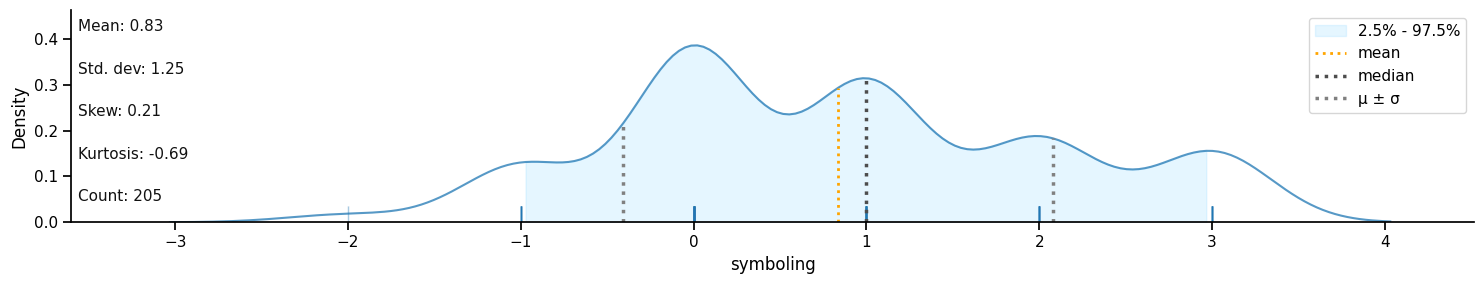

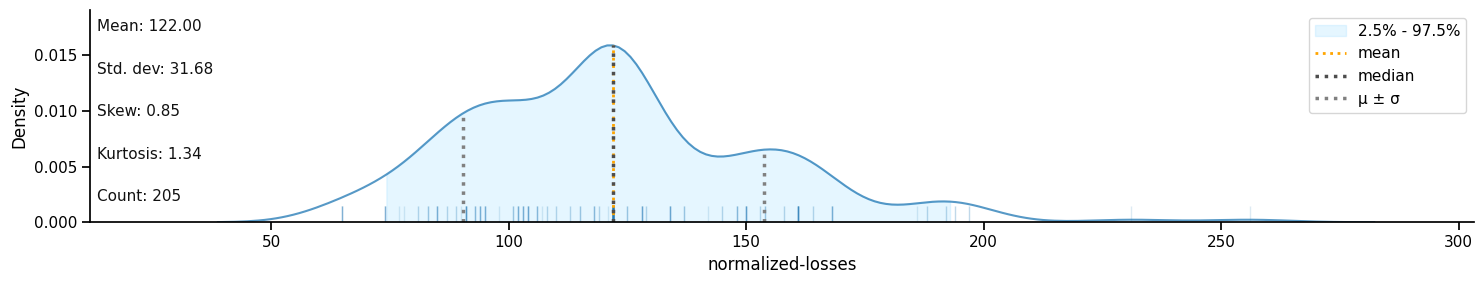

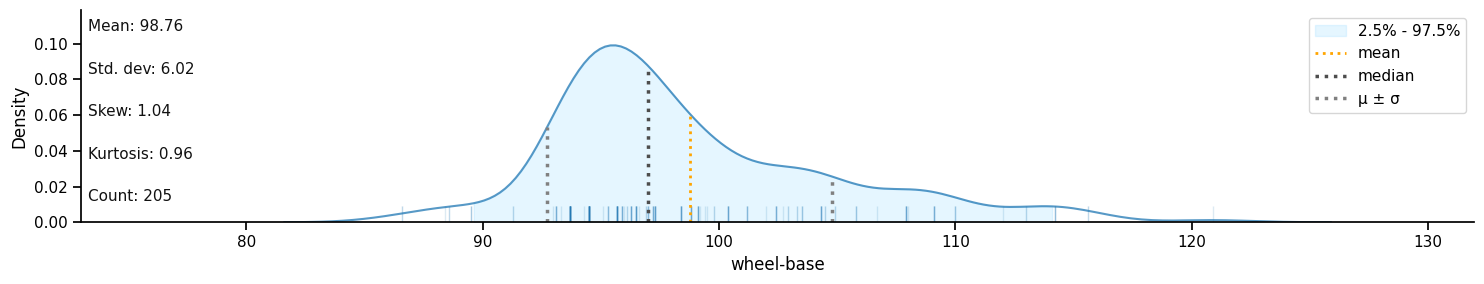

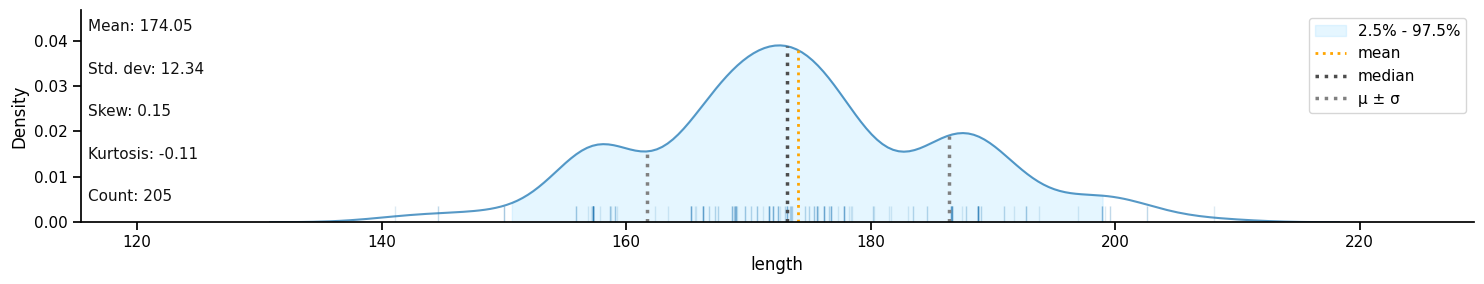

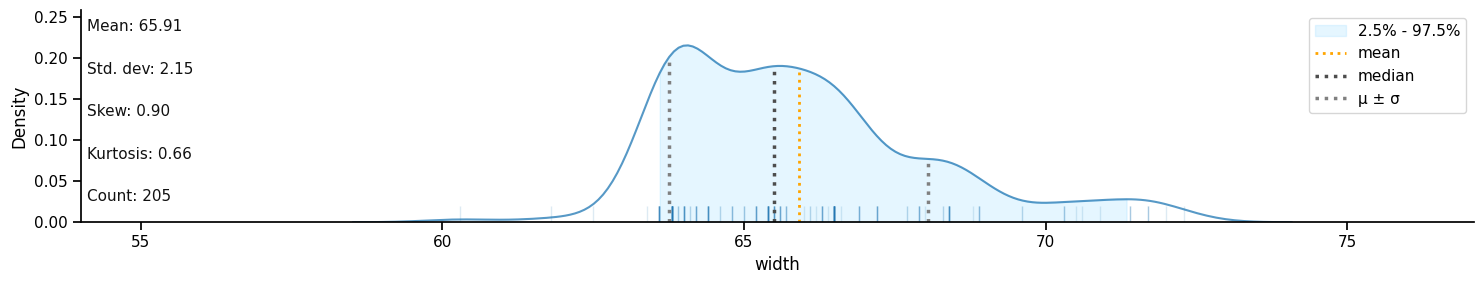

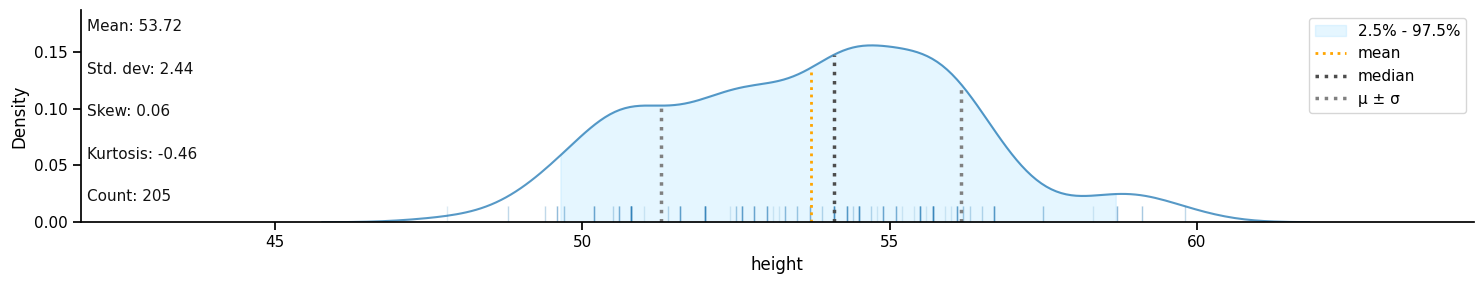

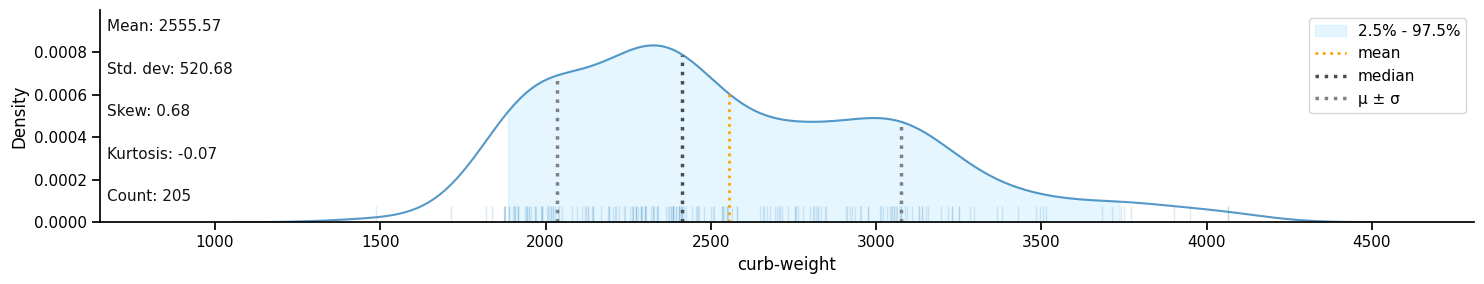

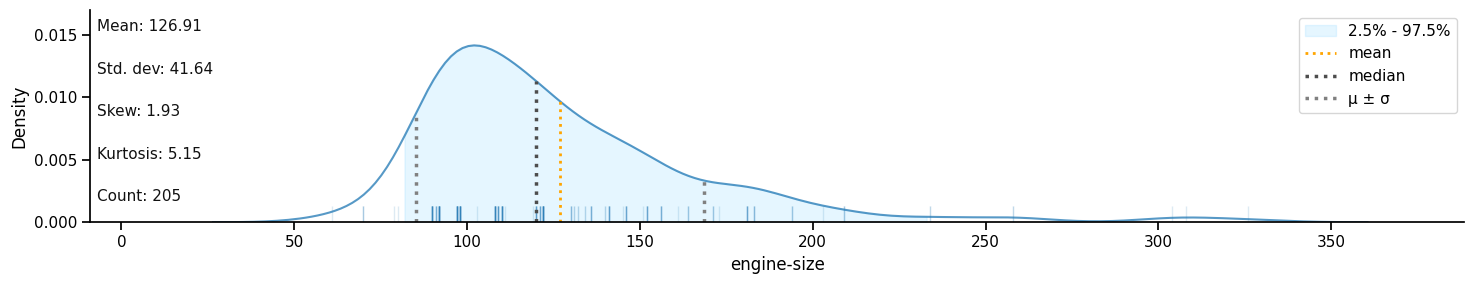

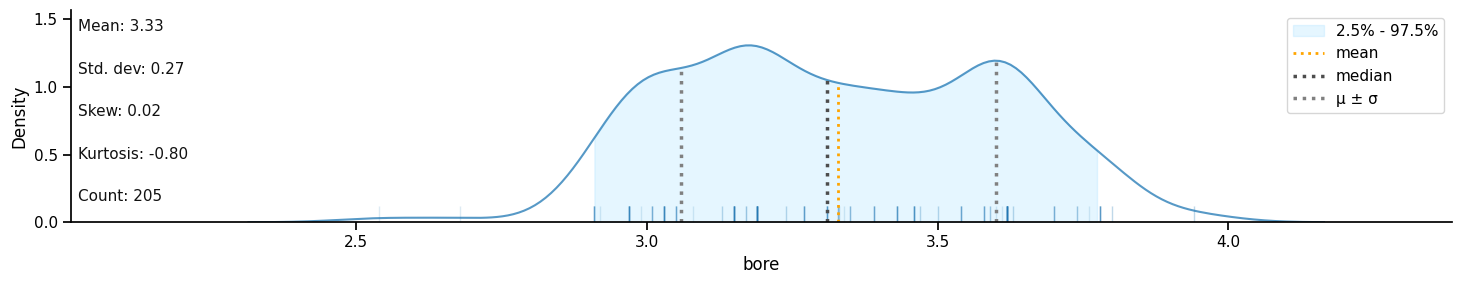

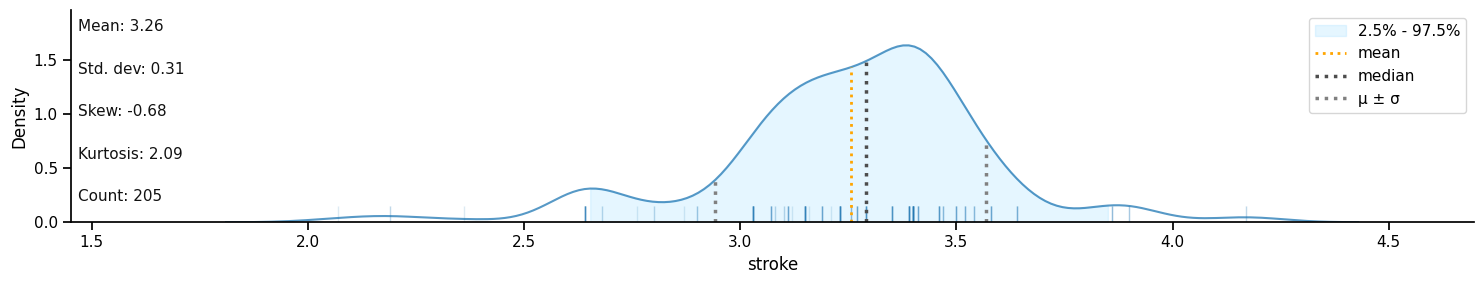

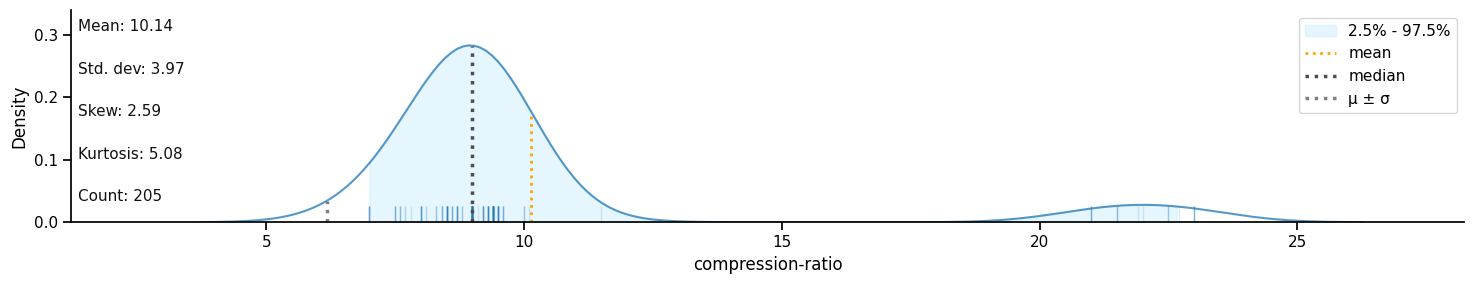

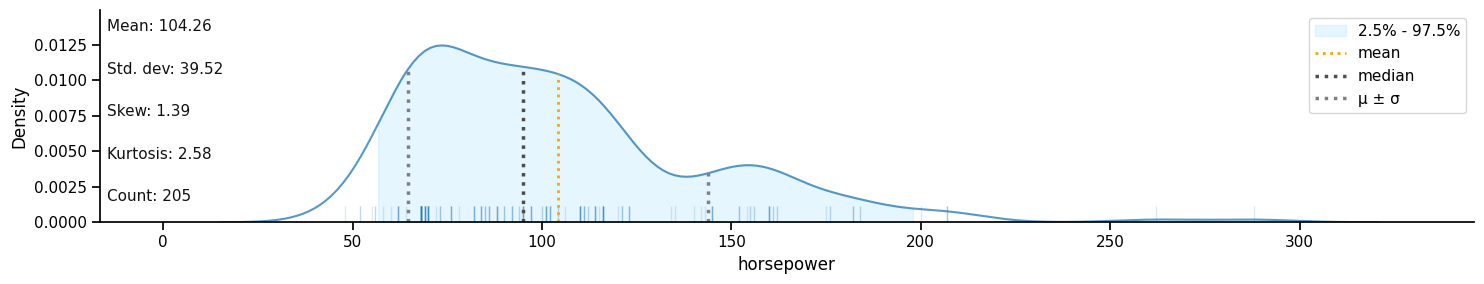

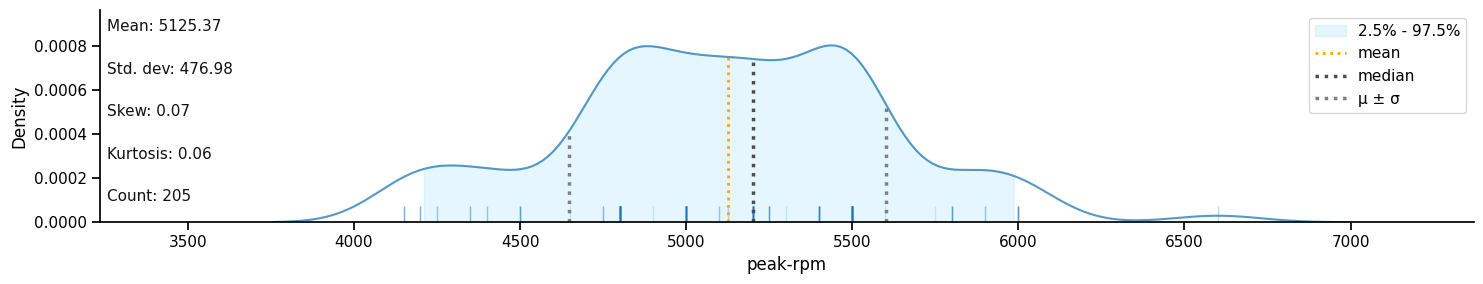

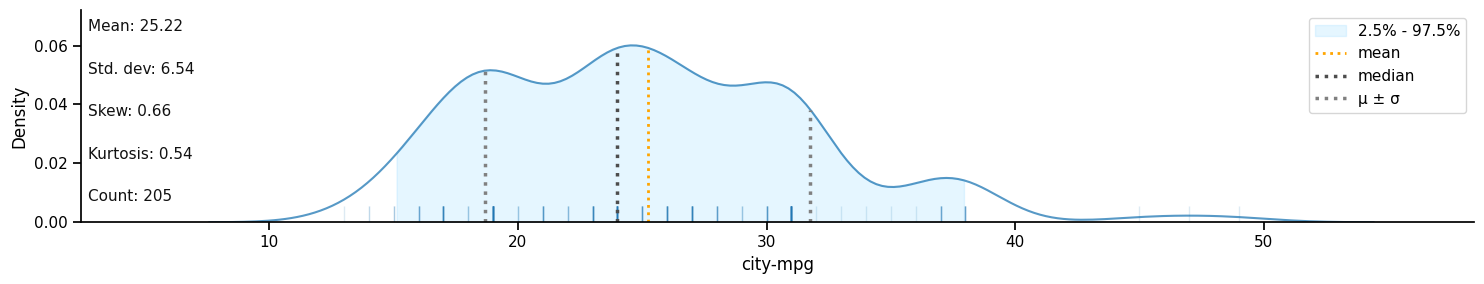

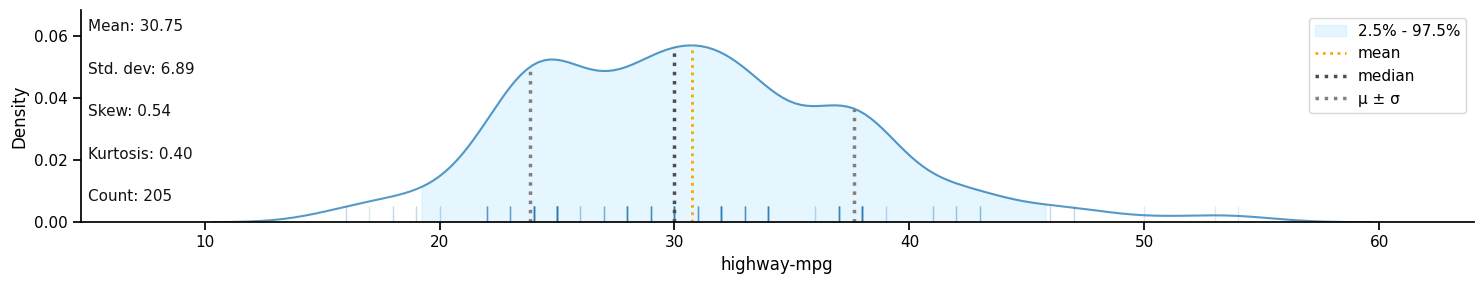

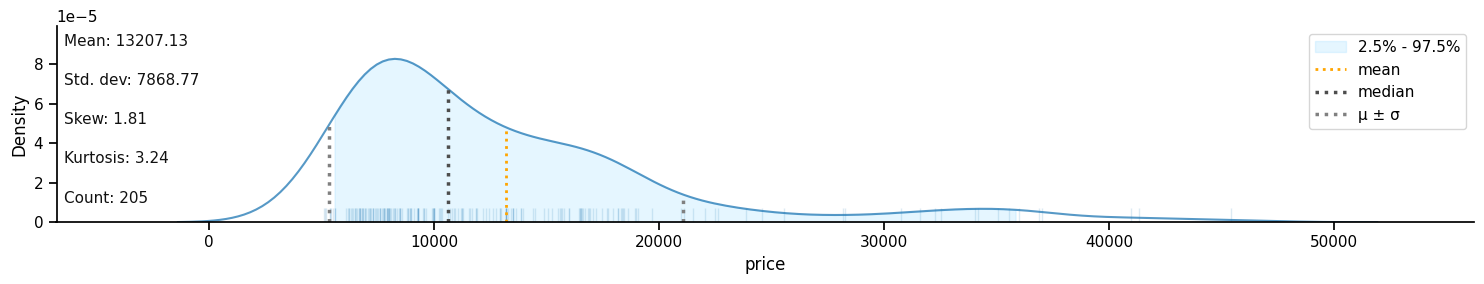

In [ ]:
numeric_columns = data.select_dtypes(include=np.number).columns
for column in numeric_columns:
    klib.dist_plot(data[column])

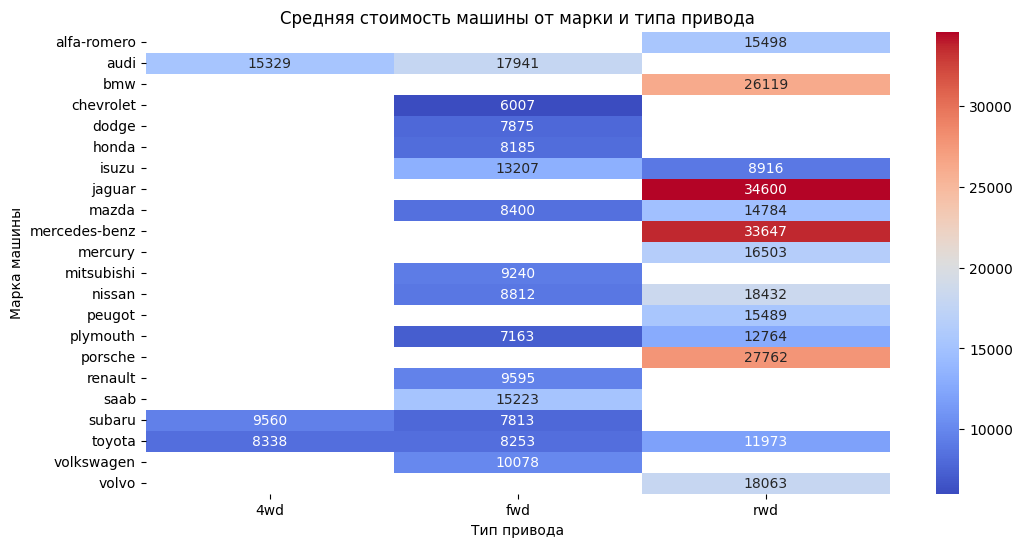

In [ ]:
pivot_table = pd.pivot_table(df, values="price", index="make", columns="drive-wheels", aggfunc=np.mean)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".0f")
plt.xlabel("Тип привода")
plt.ylabel("Марка машины")
plt.title("Средняя стоимость машины от марки и типа привода")
plt.show()

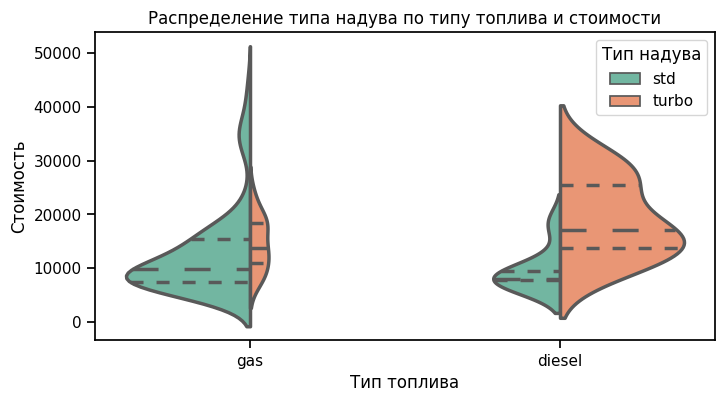

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.violinplot(x="fuel-type", y="price", hue="aspiration",data=data, palette="Set2", split=True,scale="count", inner="quartile")
plt.xlabel("Тип топлива")
plt.ylabel("Стоимость")
plt.legend(title='Тип надува')
plt.title('Распределение типа надува по типу топлива и стоимости')
plt.show()

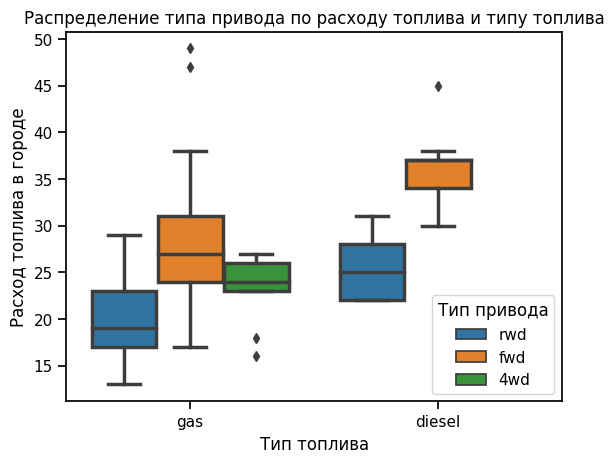

In [ ]:
sns.boxplot(x='fuel-type', y='city-mpg', hue='drive-wheels', data=data)
plt.xlabel("Тип топлива")
plt.ylabel("Расход топлива в городе")
plt.legend(title='Тип привода')
plt.title('Распределение типа привода по расходу топлива и типу топлива')
plt.show()

<ipython-input-20-7f714318d7c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


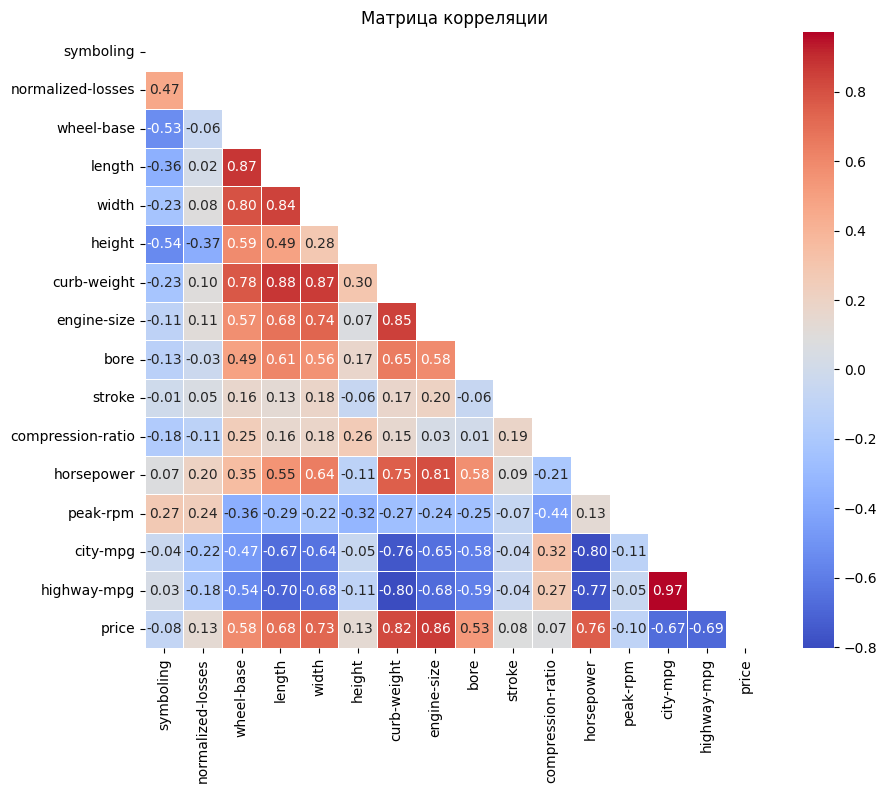

In [ ]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title("Матрица корреляции")
plt.show()

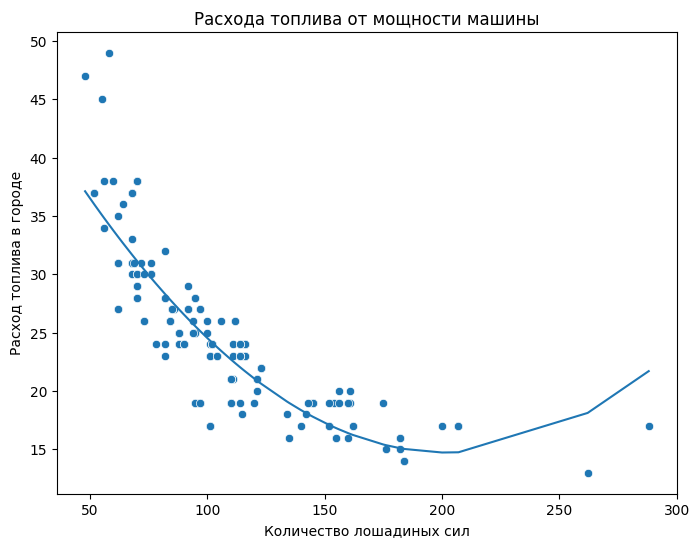

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="horsepower", y="city-mpg", data=data)
sns.lineplot(x=np.unique(data['horsepower']), y=np.poly1d(np.polyfit(data['horsepower'], data['city-mpg'], 2))(np.unique(data['horsepower'])))
plt.xlabel("Количество лошадиных сил")
plt.ylabel("Расход топлива в городе")
plt.title("Расхода топлива от мощности машины")
plt.show()

In [ ]:
bins = np.linspace(min(data["horsepower"]), max(data["horsepower"]), 4)
data['horsepower-binned'] = pd.cut(data['horsepower'], bins, labels=["low","medium","high"], include_lowest=True)

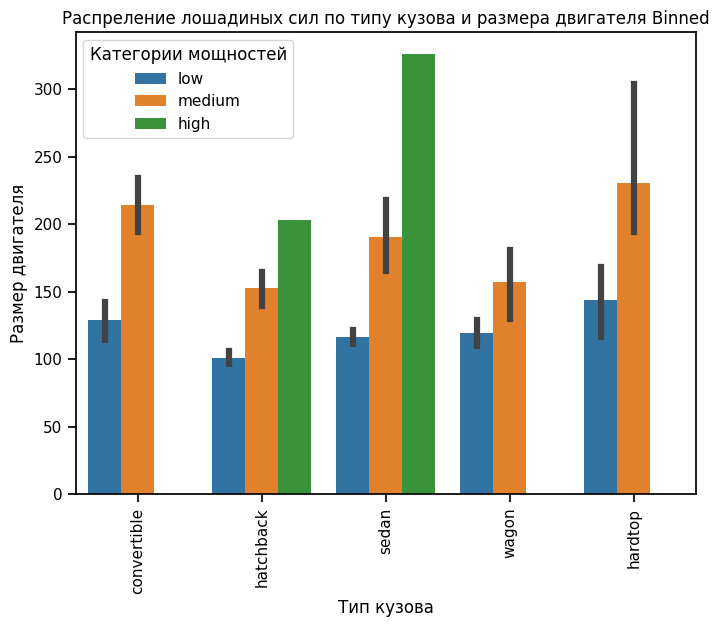

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='body-style', y='engine-size', hue='horsepower-binned', data=data)
plt.title("Engine Size by Body Style and Horsepower Binned")
plt.xlabel("Тип кузова")
plt.ylabel("Размер двигателя")
plt.legend(title='Категории мощностей')
plt.title("Распреление лошадиных сил по типу кузова и размера двигателя Binned")
plt.xticks(rotation=90)
plt.show()

In [ ]:
data["power-to-weight-ratio"] = data["horsepower"] / data["curb-weight"]*10

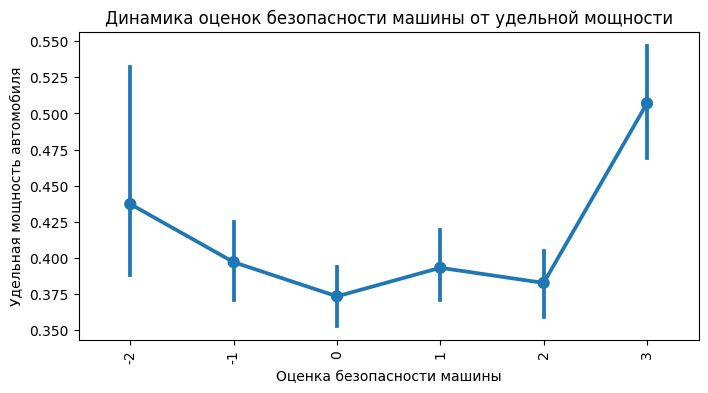

In [ ]:
plt.figure(figsize=(8, 4))
sns.pointplot(x="symboling", y="power-to-weight-ratio",data=data)
plt.xlabel("Оценка безопасности машины")
plt.ylabel("Удельная мощность автомобиля")
plt.title("Динамика оценок безопасности машины от удельной мощности")
plt.xticks(rotation=90)
plt.show()

# Обработка

In [ ]:
data['reliability-index'] = data['normalized-losses'] / data['normalized-losses'].max()

In [ ]:
data['average-city-mpg'] = data.groupby('drive-wheels')['city-mpg'].transform('mean')
data['average-highway-mpg'] = data.groupby('drive-wheels')['highway-mpg'].transform('mean')

In [ ]:
data['width-to-wheel-base-ratio'] = data['width'] / data['wheel-base']

In [ ]:
data['height-to-width-ratio'] = data['height'] / data['width']

In [ ]:
data['body-surface-area'] = 2 * ((data['length'] * data['width']) + (data['length'] * data['height']) + (data['width'] * data['height']))

In [ ]:
future_columns=['num-of-doors', 'engine-size', 'engine-location','power-to-weight-ratio', 'symboling', 'reliability-index', 'average-city-mpg', 'average-highway-mpg', 'width-to-wheel-base-ratio', 'height-to-width-ratio', 'body-surface-area']

In [ ]:
data_to_keep=data[future_columns]

In [ ]:
X = data_to_keep.drop('symboling', axis=1)
y = data_to_keep['symboling']

In [ ]:
col_trans=X.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for column in col_trans:
  X[column]=le.fit_transform(X[column])

In [ ]:
for column in X:
  print(column,': Минимальное',X[column].min(),', Максимальное',X[column].max())

num-of-doors : Минимальное 0 , Максимальное 1
engine-size : Минимальное 61 , Максимальное 326
engine-location : Минимальное 0 , Максимальное 1
power-to-weight-ratio : Минимальное 0.19935691318327975 , Максимальное 0.8556149732620321
reliability-index : Минимальное 0.25390625 , Максимальное 1.0
average-city-mpg : Минимальное 20.57894736842105 , Максимальное 28.316666666666666
average-highway-mpg : Минимальное 25.68421052631579 , Максимальное 34.225
width-to-wheel-base-ratio : Минимальное 0.5930521091811415 , Максимальное 0.7437020810514787
height-to-width-ratio : Минимальное 0.6770538243626062 , Максимальное 0.9292452830188679
body-surface-area : Минимальное 38445.62 , Максимальное 61570.86


In [ ]:
scaler = StandardScaler()
data_to_keep_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data_to_keep_scaled, columns=X.columns)

In [ ]:
for column in X:
  print(column,': Минимальное',X[column].min(),', Максимальное',X[column].max())

num-of-doors : Минимальное -0.8759231583365886 , Максимальное 1.1416526558094864
engine-size : Минимальное -1.586560610786272 , Максимальное 4.7926789111561625
engine-location : Минимальное -0.12186666955535813 , Максимальное 8.205689083394114
power-to-weight-ratio : Минимальное -2.1159759606436035 , Максимальное 4.76438403203845
reliability-index : Минимальное -1.8035895481687776 , Максимальное 4.240017534291512
average-city-mpg : Минимальное -1.2494763226525472 , Максимальное 0.8339116733218321
average-highway-mpg : Минимальное -1.224299854554939 , Максимальное 0.8393411098790944
width-to-wheel-base-ratio : Минимальное -2.914680706037899 , Максимальное 2.887640377044587
height-to-width-ratio : Минимальное -3.576940857051916 , Максимальное 2.9311458560880657
body-surface-area : Минимальное -2.3050252933160955 , Максимальное 2.8417644149088477


# Моделька

In [ ]:
model = RandomForestClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

accuracies = []
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Mean Accuracy:", np.mean(accuracies))

Mean Accuracy: 0.7902102870133559
